In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib.textpath import TextPath
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram

In [4]:
df = pd.read_csv('../dataset/complete_dataset.csv')
#dfs is the original dataframe without slicing, since df would be used as a sliced dataframe later on 
dfs = df.sample(frac=1)
dfs.shape


(10927181, 19)

Visualisation of the Dataset 

In [11]:
print(dfs.shape)
dfs.head()


(10927181, 19)


,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes
2611293,NaN,NaN,tt11105948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tvEpisode,Legalize Marinara,Legalize Marinara,0.0,2019.0,NaN,NaN,NaN,NaN
8427840,NaN,NaN,tt6618224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tvEpisode,Episode #16.51,Episode #16.51,0.0,2017.0,NaN,NaN,NaN,NaN
6001902,NaN,NaN,tt3237742,NaN,NaN,NaN,NaN,NaN,"nm3310884,nm3281527","nm3281527,nm3310884",tvEpisode,We're Not Going Back for You,We're Not Going Back for You,0.0,2011.0,NaN,NaN,NaN,NaN
9254057,NaN,NaN,tt7717234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tvEpisode,Episode dated 1 November 2017,Episode dated 1 November 2017,0.0,2017.0,NaN,NaN,NaN,NaN
8376831,NaN,NaN,tt6550368,NaN,NaN,NaN,NaN,NaN,nm3298632,NaN,tvEpisode,Episode dated 16 February 2017,Episode dated 16 February 2017,0.0,2017.0,NaN,NaN,NaN,NaN


Visualisation of Dataset without Unknown Data

In [13]:
df.dropna(subset=['text', 'genre', 'year', 'production_region'], inplace=True)
df.drop_duplicates(subset=['IMDB_ID'], inplace=True)
print(df.shape)
df.head()

(11557, 19)


,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes
109,3653850.xml,[ Subtitles by Subturtles ] Du sollst nach Hau...,tt1175,"Drama,Romance",1912.0,French,untokenisiert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,6581015.xml,HINTER DER LEIWAND Die Anwendung für die Arbei...,tt6414,"Comedy,Romance,Short",1916.0,English,untokenisiert,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,6564964.xml,DER GRAF Maße : Hals 30 cm - Ohr - 4 cm Mounth...,tt6548,"Comedy,Short",1916.0,English,untokenisiert,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,6412883.xml,"Chaplin bei der Feuerwehr "" Lass doch das Haus...",tt6684,"Comedy,Short",1916.0,English,untokenisiert,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,6565009.xml,Der Abenteurer Der Mann Jagd . Ein morgendlich...,tt7613,"Comedy,Short",1917.0,English,untokenisiert,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


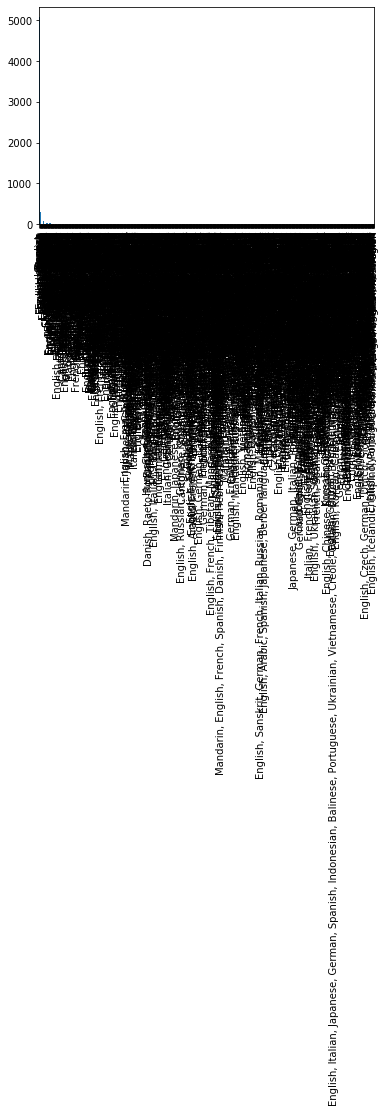

In [14]:
pd.value_counts(df['production_region']).plot.bar()



In [15]:
df.production_region.unique()
print(df.production_region.unique())


['French' 'English' 'Swedish' ... 'Chinese, English'
 'Spanish, English, Icelandic, Portuguese' 'Hebrew, English, Persian']


In [27]:
production_country = []
for prod_country in df.production_region.unique():    
    each_country = prod_country.split(', ')
    production_country = production_country + each_country
print('Number of countries mentioned in the Dataset: ', len(production_country))
print(production_country)    

Number of countries mentioned in the Dataset:  4082
['French', 'English', 'Swedish', 'German', 'Slovak', 'Swedish', 'Danish', 'Russian', 'Polish', 'German', 'English', 'English', 'French', 'Spanish', 'Arabic', 'Italian', 'Spanish', 'English', 'Hungarian', 'Latin', 'Spanish', 'Hungarian', 'English', 'Latin', 'Portuguese', 'English', 'German', 'French', 'English', 'Russian', 'English', 'Arabic', 'French', 'English', 'French', 'Cantonese', 'German', 'English', 'Italian', 'Russian', 'Spanish', 'German', 'English', 'Spanish', 'English', 'German', 'Italian', 'English', 'French', 'English', 'Polynesian', 'English', 'Italian', 'English', 'Cantonese', 'Latin', 'English', 'German', 'English', 'Arabic', 'Czech', 'English', 'Portuguese', 'French', 'German', 'English', 'Russian', 'English', 'Mandarin', 'English', 'Hebrew', 'French', 'English', 'English', 'German', 'French', 'Italian', 'English', 'Latin', 'German', 'English', 'Esperanto', 'English', 'Welsh', 'English', 'French', 'German', 'Italian',

In [28]:
a = []
for y in production_country:
    if y not in a:
        a.append(y)
print(a)

['French', 'English', 'Swedish', 'German', 'Slovak', 'Danish', 'Russian', 'Polish', 'Spanish', 'Arabic', 'Italian', 'Hungarian', 'Latin', 'Portuguese', 'Cantonese', 'Polynesian', 'Czech', 'Mandarin', 'Hebrew', 'Esperanto', 'Welsh', 'Serbian', 'Indonesian', 'Greek', 'Croatian', 'Nahuatl', 'Swahili', 'Japanese', 'Hindi', 'Swiss German', 'Athapascan languages', 'Romanian', 'Georgian', 'Navajo', 'Thai', 'American Sign Language', 'Chinese', 'Dutch', 'Turkish', 'Arapaho', 'Romany', 'Bulgarian', 'Zulu', 'Ukrainian', 'Norwegian', 'Malay', 'Tatar', 'Urdu', 'Mongolian', 'Vietnamese', 'Estonian', 'French Sign Language', 'Korean', 'Sioux', 'Neapolitan', 'Yiddish', 'Serbo-Croatian', 'Apache languages', 'Burmese', 'Creoles and pidgins', ' Ancient (to 1453)', 'Irish', 'Sicilian', 'Icelandic', 'Brazilian Sign Language', 'Aboriginal', 'Armenian', 'Lithuanian', 'Maltese', 'Khmer', 'Klingon', 'Nepali', 'Filipino', 'Kurdish', 'Finnish', 'Sinhalese', 'Persian', 'Belarusian', 'Guarani', 'Dari', 'Pushto', 'S

In [32]:
countries = a
new_countries = []
for country in countries:
    new_country = country.replace(' Sign Language', '')
    new_countries.append(new_country)
print('number of countries with sign languages: ', len(countries))
print(countries)


print('number of countries without sign languages: ', len(new_countries))
print(new_countries)

number of countries with sign languages:  172
['French', 'English', 'Swedish', 'German', 'Slovak', 'Danish', 'Russian', 'Polish', 'Spanish', 'Arabic', 'Italian', 'Hungarian', 'Latin', 'Portuguese', 'Cantonese', 'Polynesian', 'Czech', 'Mandarin', 'Hebrew', 'Esperanto', 'Welsh', 'Serbian', 'Indonesian', 'Greek', 'Croatian', 'Nahuatl', 'Swahili', 'Japanese', 'Hindi', 'Swiss German', 'Athapascan languages', 'Romanian', 'Georgian', 'Navajo', 'Thai', 'American Sign Language', 'Chinese', 'Dutch', 'Turkish', 'Arapaho', 'Romany', 'Bulgarian', 'Zulu', 'Ukrainian', 'Norwegian', 'Malay', 'Tatar', 'Urdu', 'Mongolian', 'Vietnamese', 'Estonian', 'French Sign Language', 'Korean', 'Sioux', 'Neapolitan', 'Yiddish', 'Serbo-Croatian', 'Apache languages', 'Burmese', 'Creoles and pidgins', ' Ancient (to 1453)', 'Irish', 'Sicilian', 'Icelandic', 'Brazilian Sign Language', 'Aboriginal', 'Armenian', 'Lithuanian', 'Maltese', 'Khmer', 'Klingon', 'Nepali', 'Filipino', 'Kurdish', 'Finnish', 'Sinhalese', 'Persian',

Number of countries without sign languages:  172
['French', 'English', 'Swedish', 'German', 'Slovak', 'Danish', 'Russian', 'Polish', 'Spanish', 'Arabic', 'Italian', 'Hungarian', 'Latin', 'Portuguese', 'Cantonese', 'Polynesian', 'Czech', 'Mandarin', 'Hebrew', 'Esperanto', 'Welsh', 'Serbian', 'Indonesian', 'Greek', 'Croatian', 'Nahuatl', 'Swahili', 'Japanese', 'Hindi', 'Swiss German', 'Athapascan languages', 'Romanian', 'Georgian', 'Navajo', 'Thai', 'American', 'Chinese', 'Dutch', 'Turkish', 'Arapaho', 'Romany', 'Bulgarian', 'Zulu', 'Ukrainian', 'Norwegian', 'Malay', 'Tatar', 'Urdu', 'Mongolian', 'Vietnamese', 'Estonian', 'French', 'Korean', 'Sioux', 'Neapolitan', 'Yiddish', 'Serbo-Croatian', 'Apache languages', 'Burmese', 'Creoles and pidgins', ' Ancient (to 1453)', 'Irish', 'Sicilian', 'Icelandic', 'Brazilian', 'Aboriginal', 'Armenian', 'Lithuanian', 'Maltese', 'Khmer', 'Klingon', 'Nepali', 'Filipino', 'Kurdish', 'Finnish', 'Sinhalese', 'Persian', 'Belarusian', 'Guarani', 'Dari', 'Push